# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [2]:
# place your code into this Code cell
data = pd.read_csv("data/NYPD_Shooting_Incident_Data__Historic_.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

<p style="color:#009">First, randomly display 5 rows in the raw dataset:</p>

In [3]:
data.sample(5) #random display of 5 rows of data

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
413,142902648,05/14/2015,14:23:00,BRONX,46,0.0,NaN,False,18-24,M,WHITE HISPANIC,25-44,F,WHITE HISPANIC,1.009430e+06,250363.484375,40.853837,-73.908982,POINT (-73.90898205499997 40.85383718800006)
22173,91727927,07/20/2013,14:10:00,BROOKLYN,83,0.0,NaN,False,18-24,M,BLACK,45-64,M,WHITE HISPANIC,1.007032e+06,193357.765625,40.697378,-73.917843,POINT (-73.91784290999993 40.69737806400008)
20660,160509029,01/21/2017,21:35:00,BROOKLYN,67,0.0,MULTI DWELL - APT BUILD,False,NaN,NaN,NaN,<18,M,BLACK,9.990096e+05,171975.734375,40.638706,-73.946820,POINT (-73.94682044299998 40.63870617100008)
18746,203211776,10/03/2019,00:38:00,MANHATTAN,33,0.0,NaN,True,NaN,NaN,NaN,25-44,M,WHITE HISPANIC,1.001505e+06,245382.500000,40.840185,-73.937640,POINT (-73.93764029999994 40.84018489700003)
6807,205280615,11/17/2019,21:12:00,BRONX,43,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,18-24,M,BLACK,1.020891e+06,236726.390625,40.816367,-73.867626,POINT (-73.86762585699995 40.81636721700005)


<p style="color:#009">Below the column names and their corresponding types are shown. First get the column names by `df.dolumn()` and then find the data type of values in the a row with all non-NAN values(closest to the definition of the contents of each column of this dataset):</p>

In [4]:
for col_name in list(data.columns):
    print("%25s: %s"%(col_name,type(data[col_name][22311]).__name__))

             INCIDENT_KEY: int64
               OCCUR_DATE: str
               OCCUR_TIME: str
                     BORO: str
                 PRECINCT: int64
        JURISDICTION_CODE: float64
            LOCATION_DESC: str
  STATISTICAL_MURDER_FLAG: bool_
           PERP_AGE_GROUP: str
                 PERP_SEX: str
                PERP_RACE: str
            VIC_AGE_GROUP: str
                  VIC_SEX: str
                 VIC_RACE: str
               X_COORD_CD: float64
               Y_COORD_CD: float64
                 Latitude: float64
                Longitude: float64
                  Lon_Lat: str


<p style="color:#009">The raw dataset contains 23.6k shooting incednet records, and 19 columns/fields indicating relavant information.Definition was given as below. To refer to the original dataset, click <a href="https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8">here</a>.</p>

|Column Name            |Description                                                                     |Type                                                                                              |
|-----------------------|--------------------------------------------------------------------------------|----------|
|INCIDENT_KEY           |Randomly generated persistent ID for each arrest                                |Plain Text                                                                                        |
|OCCUR_DATE             |Exact date of the shooting incident                                             |Date & Time                                                                                      |
|OCCUR_TIME             |Exact time of the shooting incident                                             |Plain Text                                                                                        |
|BORO                   |Borough where the shooting incident occurred                                    |Plain Text                                                                                        |
|PRECINCT               |Precinct where the shooting incident occurred                                   |Number                                                                                            |
|JURISDICTION_CODE      |Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol) 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions|Number                                                                                            |
|LOCATION_DESC          |Location of the shooting incident                                               |Plain Text                                                                                        |
|STATISTICAL_MURDER_FLAG|Shooting resulted in the victim’s death which would be counted as a murder      |Checkbox                                                                                          |
|PERP_AGE_GROUP         |Perpetrator’s age within a category                                             |Plain Text                                                                                        |
|PERP_SEX               |Perpetrator’s sex description                                                   |Plain Text                                                                                        |
|PERP_RACE              |Perpetrator’s race description                                                  |Plain Text                                                                                        |
|VIC_AGE_GROUP          |Victim’s age within a category                                                  |Plain Text                                                                                        |
|VIC_SEX                |Victim’s sex description                                                        |Plain Text                                                                                        |
|VIC_RACE               |Victim’s race description                                                       |Plain Text                                                                                        |
|X_COORD_CD             | Midblock X-coordinate for New York State Plane Coordinate System Long Island Zone NAD 83 units feet (FIPS 3104)|Plain Text                                                                                        |
|Y_COORD_CD             | Midblock Y-coordinate for New York State Plane Coordinate System Long Island Zone NAD 83 units feet (FIPS 3104)|Plain Text                                                                                        |
|Latitude               |Latitude coordinate for Global Coordinate System WGS 1984 decimal degrees (EPSG 4326)|Number                                                                                            |
|Longitude              |Longitude coordinate for Global Coordinate System WGS 1984 decimal degrees (EPSG 4326)|Number                                                                                            |
|Lon_Lat                |Longitude and Latitude Coordinates for mapping                                  |Point                                                                                             |

<p style="color:#009">The dataset is interesting because it records not only the ages and genders of perpetrators and victims, but also the exact locations of the crimes' occurences besides the clarification of boroughs. Also, date and time of the crime are well recorded, so that I could do analysis according to the occurence time. This data gives user opportunities to analyze crime relevant to age, gender, location, and even relate it to the historical background of a certain time period to see the change in crime control, if possible.</p>

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

<p style="color:#009">In this step, I removed all the rows with NaN,'UNKNOWN' and 'NONE' in them. This is because the very commonly in the original data, values such as Perpetrator’s age within a category are missing, but they might be crucial in future data anaytics, such as relating the crime rate with the peretrator's age.Also, these indicator strings may be bothering especially in columns with numbers only. There is no further need to sort the remaining records in chronical order as they are already being in that pattern. </p>

In [5]:
print("First Five rows before munging:[shape:%s]"%(str(data.shape)))
data.head()

First Five rows before munging:[shape:(23585, 19)]


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,03/11/2011,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,203350417,10/06/2019,01:09:00,BROOKLYN,77,0.0,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
3,80584527,09/04/2011,03:35:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
4,90843766,05/27/2013,21:16:00,QUEENS,100,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)


In [6]:
data = data.dropna() # drop all rows with NaN
data.drop(data[data.apply(lambda row: 'UNKNOWN' in row.to_string(header=False), axis=1)].index, inplace=True) # drop all rows with 'UNKNOWN'
data.drop(data[data.apply(lambda row: 'NONE' in row.to_string(header=False), axis=1)].index, inplace=True) # drop all rows with 'NONE'
print("First Five rows after munging:[shape:%s]"%(str(data.shape)))
data.head()

First Five rows after munging:[shape:(5347, 19)]


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
25,16814011,06/13/2006,20:56:00,BROOKLYN,70,0.0,MULTI DWELL - APT BUILD,True,25-44,M,BLACK,25-44,M,BLACK,9.957930e+05,173152.000000,40.641940,-73.958408,POINT (-73.95840837999998 40.641939543000035)
31,144732382,07/23/2015,00:22:00,BROOKLYN,90,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,WHITE HISPANIC,25-44,M,BLACK,1.001020e+06,196399.875000,40.705741,-73.939516,POINT (-73.93951647099993 40.70574137600005)
32,68964080,12/17/2009,13:45:00,MANHATTAN,20,0.0,MULTI DWELL - APT BUILD,True,25-44,M,WHITE HISPANIC,45-64,F,WHITE HISPANIC,9.908386e+05,225657.703125,40.786060,-73.976209,POINT (-73.97620917299997 40.78606022200006)
41,85875439,07/22/2012,21:35:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,<18,M,BLACK,25-44,M,BLACK,1.011047e+06,239814.234375,40.824878,-73.903179,POINT (-73.90317908399999 40.82487781900005)
42,175773152,03/12/2018,03:40:00,QUEENS,102,0.0,PVT HOUSE,False,25-44,M,BLACK,25-44,F,AMERICAN INDIAN/ALASKAN NATIVE,1.031923e+06,190474.531250,40.689365,-73.828099,POINT (-73.82809923699995 40.68936518700008)


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

<p style="font-weight:bold">1) Find the Borough that shooting incidents happened most frequently, and locate the crime center.</p>

<p style="color:#009">This analysis is for locating the crime center. The first step is to find the mode of borough's occurences by creating a dictionary associating borough and number of incidents and then manually and interatively find the max, because the more shooting incidents implies area with more crime and active criminals. The next step is to find the crime center by taking averages of the longitude and latitude. This task is helpful in giving a taste of the overall "mean" of the location, a centralized behavior. </p>

In [7]:
# count the incidents and find the max of them; here I used a dict trasfrom as a relay for searching for max key
all_cases = dict(data['BORO'].value_counts())
most_freq_shooting_boro = max(all_cases, key = all_cases.get)
print("%s has most frequent shooting incedents."%most_freq_shooting_boro)
# To find the crime center, we need to get the mean of Longitude and Latitude.
brooklyn_data = data[data['BORO']=='BROOKLYN']
center_lon = np.mean(brooklyn_data['Longitude'])
center_lat = np.mean(brooklyn_data['Latitude'])
# To get more detail on the location, attribute the center to the nearest precient, 
# by the finding the one precient with least sum of squared distance
center_loc = None
loss = float('inf')
for index, loc in brooklyn_data.iterrows():
    temp_loss = (loc[17]-center_lon)**2 + (loc[16]-center_lat)**2
    if temp_loss < loss:
        loss = temp_loss
        center_loc = loc
print("Crime center's coordinate for Global Coordinate System is POINT(%f,%f),\
 near precient #%d"%(center_lon,center_lat,loc[4]))

BROOKLYN has most frequent shooting incedents.
Crime center's coordinate for Global Coordinate System is POINT(-73.934119,40.666096), near precient #81


<p style="font-weight:bold">2) For each Borough, find the rate of death of victims, and state the Borough with lowest death rate.</p>

<p style="color:#009">This task is inpired by a sense of "level of violence" of shooting cases in each borough. As this calculates the rate, the statistics might mean a larger number of cases overall in that borough. The process of calculation starts with creating a dictionary that isolates cases of each borough that caused death, and then  devide each borough's value by the corresponding value in Q1)'s dictionary of total cases.</p>

In [8]:
# get the count of murder cases identified by 'STATISTICAL_MURDER_FLAG' == True for each borough
murder_cases = dict(data['BORO'][data['STATISTICAL_MURDER_FLAG']==True].value_counts())
boro_murder_rate = {}
# calculate the murder occurence rate out of all shooting incidents
for key in all_cases.keys():
    boro_murder_rate[key] = murder_cases[key]/all_cases[key]
# find and print the max value in dict and its corresponding key 
print("Borough with lowest death rate, %f%%, is %s"%(max(boro_murder_rate.values())*100, max(boro_murder_rate, key = boro_murder_rate.get)))

Borough with lowest death rate, 27.888446%, is BRONX


<p style="font-weight:bold">3) Regarding Manhattan, find the year with lowest number of shooting incedencts happended.</p>

<p style="color:#009">First, isolates all the cases that took place in Manhattan. Secondly, strip the year from the string of 'OCCUR_DATE', then count the cases in each year by grouping them and store in a dictionary in form "year: #cases". Finally, find the min in values and print out the correspinding key.</p>

In [9]:
# First, slice the rows with borough manhattan 
manhattan_data = data[data['BORO']=='MANHATTAN']
manhattan_dict = {}
# group and count the incidences of each year by the last 4 characters of "OCCUR_DATE"
for index, item in manhattan_data.iterrows():
    if item[1][-4:] not in manhattan_dict.keys():
        manhattan_dict[item[1][-4:]] = 1
    else:
        manhattan_dict[item[1][-4:]] += 1
# find and print the lowest value in dict and its corresponding key 
print("In Manhattan, year %s has lowest number of shooting incedents of %s cases."%(min(manhattan_dict, key = manhattan_dict.get), min(manhattan_dict.values())))

In Manhattan, year 2018 has lowest number of shooting incedents of 21 cases.


<p style="font-weight:bold">4) For each age group of perpetrators, find out the ratio of male criminal to that of female, and sort the outcomes high to low.</p>

<p style="color:#009">Count the number of male and female criminals within each age group, and then store the age groups as keys and counts as values in two dictionaries. For each age group, calculate the ratio by dividing the two counts. Finally, sort the dictionary to have the outcome ratio high to low.</p>

In [39]:
male_perpetrators_by_age = dict(data['PERP_AGE_GROUP'][data['PERP_SEX']=='M'].value_counts())
female_perpetrators_by_age = dict(data['PERP_AGE_GROUP'][data['PERP_SEX']=='F'].value_counts())
mf_ratio_perpetrators_by_age = {}
for key in male_perpetrators_by_age.keys():
    if key in female_perpetrators_by_age.keys():
        mf_ratio_perpetrators_by_age[key] = male_perpetrators_by_age[key]/female_perpetrators_by_age[key]
print('The following ratio means xxx:1(male:female), where xxx is the number displayed:')
dict(sorted(mf_ratio_perpetrators_by_age.items(), key=lambda item: item[1], reverse = True))


The following ratio means xxx:1(male:female), where xxx is the number displayed:


{'18-24': 38.09836065573771,
 '65+': 35.0,
 '25-44': 30.07246376811594,
 '<18': 23.818181818181817,
 '45-64': 18.083333333333332}

<p style="font-weight:bold">5) For jurisdiction code 2(Housing), show the first 10 cases by the age group of victims, in the descending order. From that, find the ratio of victims under 18.</p>

<p style="color:#009">By selecting the jurisdiction code = 2 from the original data, we get the slice that has housing category; then, by sorting the data in descending order of the victims' age groups, I show the reordered record slice, starting with records with victim's age under 18. By deviding the count of records with victim uder 18 by all records with jurisdiction code 2, we get the percentage.</p>

In [38]:
data_jcode2 = data[data['JURISDICTION_CODE']==2].sort_values(by='VIC_AGE_GROUP', ascending = False)
print("Victim under 18 takes %s%% in the jurisdiction of housing shooting incidents."%round(len(data_jcode2[data_jcode2['VIC_AGE_GROUP']=='<18'])/len(data_jcode2)*100,3))
data_jcode2

Victim under 18 takes 13.109% in the jurisdiction of housing shooting incidents.


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
11883,76864987,01/16/2011,17:10:00,BROOKLYN,88,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,<18,M,BLACK,9.893147e+05,192297.140625,40.694495,-73.981737,POINT (-73.98173739799995 40.69449476800003)
5615,82361864,12/27/2011,02:16:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,False,<18,M,BLACK,<18,M,BLACK HISPANIC,1.007217e+06,234876.906250,40.811337,-73.917033,POINT (-73.91703348099998 40.81133703200004)
16956,163842831,04/16/2017,21:09:00,STATEN ISLAND,120,2.0,MULTI DWELL - PUBLIC HOUS,False,<18,M,BLACK,<18,M,BLACK,9.614926e+05,166568.671875,40.623848,-74.081981,POINT (-74.08198120899993 40.62384798800009)
16968,72636950,05/10/2010,16:20:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,<18,M,BLACK,<18,M,BLACK,1.019404e+06,182905.140625,40.668648,-73.873278,POINT (-73.87327795299996 40.66864751500003)
17120,67895117,11/16/2009,15:45:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,<18,M,BLACK,<18,F,WHITE HISPANIC,1.012422e+06,240916.000000,40.827898,-73.898205,POINT (-73.89820515299994 40.82789757000006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15404,51893517,10/04/2008,03:10:00,QUEENS,114,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,18-24,M,BLACK,9.995847e+05,214040.703125,40.754164,-73.944653,POINT (-73.94465265199995 40.754163736000066)
15433,47945810,07/02/2008,01:15:00,BROOKLYN,84,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK HISPANIC,9.890081e+05,192549.609375,40.695188,-73.982843,POINT (-73.98284295599996 40.69518790600006)
6508,90702196,05/19/2013,03:12:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,9.998494e+05,193275.859375,40.697169,-73.943745,POINT (-73.94374542299994 40.69716882500006)
6489,85854720,07/21/2012,17:55:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,18-24,M,BLACK,1.015829e+06,179159.546875,40.658380,-73.886185,POINT (-73.88618497099998 40.65838017200008)


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

<p style="font-weight:bold">1) Create a line graph to show the trend of number of shooting incidents in each borough over the years, for the goal of visual comparison.</p>

<p style="color:#009">This visualization shows and compares the trend of occurences of shooting in differnt boroughs over recorded years. To do this, first we need to get the list of recorded boroughs, and for each of them, create a dictionary for holding counts of incidents every year. Merge the dictionary and convert it to a pandas DataFrame, and use that for plotting line graphs of different boroughs in the same figure.</p>

In [123]:
boro_list = list(data.BORO.unique())
all_boro_dict = {}
for boro in boro_list:
    temp_data = data[data['BORO'] == boro]
    temp_dict = {}
    # group and count the incidences of each year by the last 4 characters of "OCCUR_DATE"
    for index, item in temp_data.iterrows():
        if item[1][-4:] not in temp_dict.keys():
            temp_dict[item[1][-4:]] = 1
        else:
            temp_dict[item[1][-4:]] += 1
    temp_dict = {key: str(value) for key, value in temp_dict.items()}
    if len(all_boro_dict) == 0:
        temp_dict = {key: [value] for key, value in temp_dict.items()}
        all_boro_dict = temp_dict
    else:
        for key, value in all_boro_dict.items():
            all_boro_dict[key].append(temp_dict[key])
# dictionary to df
all_boro_dict = {int(k):[int(s) for s in v] for k,v in all_boro_dict.items()}
df_1 = pd.DataFrame.from_dict(all_boro_dict,orient='index').sort_index()
df_1.rename(columns={0:boro_list[0],1:boro_list[1],2:boro_list[2],3:boro_list[3],4:boro_list[4]},inplace=True)

Text(0, 0.5, 'incidents')

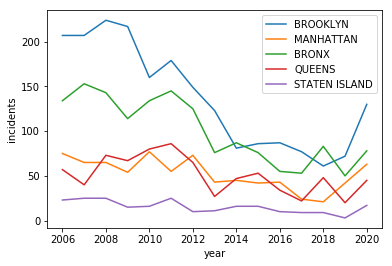

In [126]:
df_1.plot()
plt.xlabel("year")
plt.ylabel("incidents")

<p style="font-weight:bold">2) Then, use the stacked area charts to show the number of shooting incidents of each borough with the total cases each year.</p>

<p style="color:#009">Using the DataFrame we created in last part, we draw a stacked area charts to give a visual of the change of total number of incidents each year, as well as the portion of incidents that each borough takes part of. This chart is useful as it shows the trend, sum and segment weight at the same time.</p>

Text(0, 0.5, 'incidents')

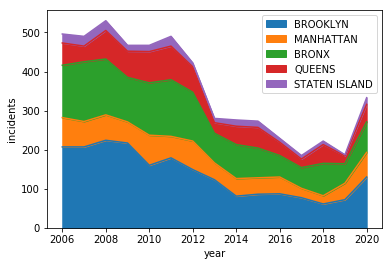

In [127]:
df_1.plot.area()
plt.xlabel("year")
plt.ylabel("incidents")

<p style="font-weight:bold">3) Using a pie chart, show the portion of each race of victims out of all crimes.</p>

<p style="color:#009">This visualization provides the sense of proportions, that how many out of all victims are of which races. To do this, first create a dictionary that holds counts of victims of each race. Then, turn the dictionary into a DataFrame so that we can draw a pie chart.</p>

Text(0, 0.5, '')

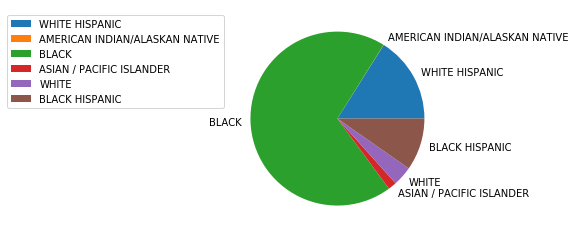

In [184]:
df_2 = pd.DataFrame.from_dict(dict(data['VIC_RACE'].value_counts()), orient='index')
df_2.sample(frac=1).plot.pie(subplots=True)
plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)
plt.ylabel('')

<p style="font-weight:bold">4) Use the bar charts to compare the male-female ratio in each age group of perpetrators.</p>

<p style="color:#009">Continued from part data analysis Q4, this visualization compares the counts of each year group's perpetrators as well as comparing the proportions of female and male within each age group. The reason of no choosing a line graph is that this is not a trend, rather, this is a display of categorical values which are parallel regardless of time.</p>

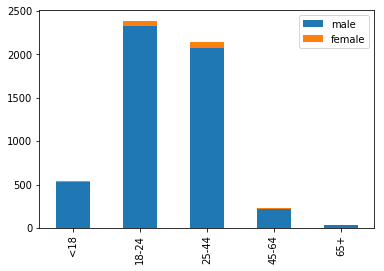

In [203]:
dict_3 = {key: [value] for key, value in female_perpetrators_by_age.items()}
for key, value in dict_3.items():
        dict_3[key].insert(0,male_perpetrators_by_age[key])
dict_3 = {k:[int(s) for s in v] for k,v in dict_3.items()}
df_3 = pd.DataFrame.from_dict(dict_3,orient='index').reindex(['<18','18-24','25-44','45-64','65+']).rename(columns={0:'male',1:'female'})
df_3.plot.bar(stacked = True)

<p style="font-weight:bold">5) Use a scatter plot to map the location of crimes, and mark the crime center.</p>

<p style="color:#009">The scatter plot shows the distribution of cases. Where the points are dense indicates high crimial activities, and where those are loose implies lower activities. From part data analysis 1), we got the crime center by our definition of mode-mean; we plot it together in the graph below.</p>

<Figure size 432x288 with 0 Axes>

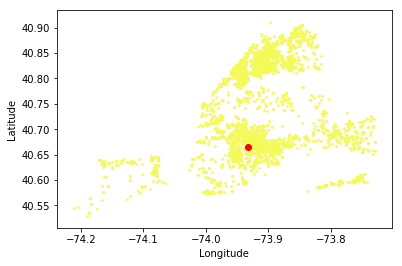

In [207]:
df_4 = data[['Longitude','Latitude']]
plt.figure()
df_4.plot.scatter(x='Longitude',y='Latitude',s=3,c="#F4FA58",colormap='viridis')
# recall the crime center we found in data analysis 1):
plt.scatter(center_loc.Longitude, center_loc.Latitude, c="red")